# Uploading Volume (Cutout) Data From an HDF5 File
Let's say you have a local hdf5 file that contains volume data, and you want to upload it to the neurodata OCP server as a cutout.

ndio can help you read, refine, and upload data.

## Reading an HDF5 File
ndio uses the h5py library to read and parse hdf5 files. To import an hdf5 file, do the following:

In [1]:
import ndio.convert.hdf5 as ndh5

# download this file from http://openconnecto.me/ocp/ca/kasthuri11/image/hdf5/3/1536,1636/1536,1636/950,953/
filename = "kasthuri11-image-hdf5-3-1536_1636-1536_1636-950_953-ocpcutout.h5"

data = ndh5.import_hdf5(filename)

The `data` variable now holds the value of the `/CUTOUT` dataset of the file in a numpy array.

In [2]:
print data.shape

(3, 100, 100)


## Uploading a numpy array to OCP
ndio + OCP natively supports numpy arrays, which means that storing your existing data in OCP is easy. To access the database, instantiate a new `Remote` that points to the OCP server:

In [3]:
import ndio.remote.OCP as OCP
oo = OCP()

Then push your data using `post_cutout`:

In [4]:
# Default axis order is [z, x, y].
origin = [1, 0, 0]

oo.post_cutout('ndio_demos', 'image', x_start=origin[1], x_stop=origin[1] + data.shape[1],
                                      y_start=origin[2], y_stop=origin[2] + data.shape[2],
                                      z_start=origin[0], z_stop=origin[0] + data.shape[0], data=data, roll_axis=False)

True

### A note about axis ordering
OCP reads data in $(z, x, y)$ order, which isn't necessarily how your data is formatted. We take this into account when uploading data through ndio, so **ndio rolls the axis of `data` before uploading.** If your numpy array is *already* in $(z, x, y)$, don't worry -- simply pass `roll_axis=False` to `post_cutout` and we'll skip this step.

## Confirming Successful Upload
Let's pull down an image to verify that we've successfully uploaded data.

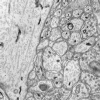

In [5]:
img = oo.get_image('ndio_demos', 'image',
                   x_start=origin[1], x_stop=origin[1] + data.shape[1],
                   y_start=origin[2], y_stop=origin[2] + data.shape[2],
                   z_index=origin[0])
from PIL import Image
from StringIO import StringIO
Image.open(StringIO(img))

Shweet.